In [1]:
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

clientes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

nos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

capacidade dos clientes: {1: 6, 2: 9, 3: 6, 4: 1, 5: 1, 6: 2, 7: 8, 8: 7, 9: 3, 10: 5}

localização x: [ 83.83890288 137.04390008  40.89044995 175.62348728   5.47751864
 134.09350204  83.46096047 111.73796569  28.07738772  39.62029782
 160.14891374]

localização y: [96.82615757 31.34241782 69.23226157 87.63891523 89.46066635  8.50442114
  3.90547832 16.98304196 87.81425034  9.83468338 42.1107625 ]



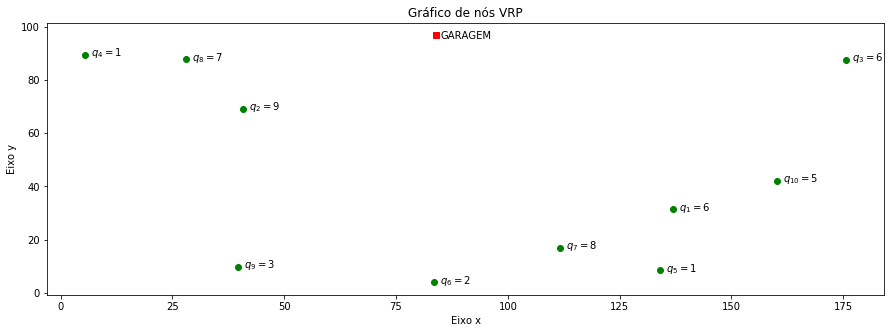

In [2]:
#CRIANDO OS DADOS:
n=10 #NÚMERO DE CLIENTES

clientes=[x for x in range(1, n+1)]

nos=[0]+clientes #CRIAÇÃO DOS NÓS
Q=15 #CAPACIDADE MÁXIMA DO CAMINHÃO

rnd=np.random
rnd.seed(1)

q={i:rnd.randint(1,10) for i in clientes} #GERANDO A CAPACIDADE DE CADA CLIENTE

print("clientes: {}\n".format(clientes))
print("nos: {}\n".format(nos))
print("capacidade dos clientes: {}\n".format(q))

#CRIANDO AS COORDENADAS
loc_x=rnd.rand(len(nos))*200
print("localização x: {}\n".format(loc_x))

loc_y=rnd.rand(len(nos))*100
print("localização y: {}\n".format(loc_y))

#MOSTRANDO ONDE ESTÃO OS CLIENTES
plt.figure(figsize=(15,5)) #TAMANHO DO GRÁFICO
plt.scatter(loc_x, loc_y, color='green') #PONTOS DO GRÁFICO

#COLOCANDO UMA NOTAÇÃO EM CADA PONTO PARA DIFERENCIAR CADA CLIENTE
#E TAMBÉM COLOCANDO O CUSTO DE CADA CLIENTE A SER VISITADO
for i in clientes:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(loc_x[i]+1.3,loc_y[i]-0.5))

#PLOTANDO O LOCAL ONDE OS CAMINHÕES SAEM
plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
plt.annotate('GARAGEM',(loc_x[0]+1,loc_y[0]-1.4))

plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title("Gráfico de nós VRP")

plt.show()

In [3]:
#CRIANDO A ESTRUTURA DE DADOS PARA AS DISTÂNCIAS DOS NÓS
arcos={(i,j) for i in nos for j in nos if i!=j}
print("Arcos: {}\n".format(arcos))

#CALCULANDO A DISTÂNCIA ENTRE TODOS OS PONTOS
distancia={(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j])
            for i in nos for j in nos if i!=j}
print("Distâncias: {}\n".format(distancia))

#CRIANDO E OPTIMIZANDO O MODELO CVRP
mdl=Model('CVRP')

#CRIANDO AS VARIÁVEIS DE DECISÃO
x=mdl.binary_var_dict(arcos,name='x')
u=mdl.continuous_var_dict(nos,ub=Q,name='u')

mdl.minimize(mdl.sum(distancia[i,j]*x[i,j] for i,j in arcos))

mdl.add_constraints(mdl.sum(x[i,j] for j in nos if i!=j)==1 for i in clientes)
mdl.add_constraints(mdl.sum(x[i,j] for i in nos if i!=j)==1 for j in clientes)

mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[i]==u[j])
                                for i,j in arcos if i!= 0 and j!=0)

mdl.add_constraints(u[i]>=q[i] for i in clientes)

print(mdl.export_to_string())

mdl.parameters.timelimit=120
solucao=mdl.solve(log_output=True)

Arcos: {(7, 3), (6, 9), (0, 7), (1, 6), (0, 10), (3, 7), (2, 5), (8, 5), (5, 8), (4, 0), (10, 8), (9, 0), (6, 7), (10, 7), (7, 6), (6, 10), (0, 4), (4, 10), (3, 2), (2, 6), (8, 2), (4, 5), (9, 3), (6, 0), (7, 5), (0, 1), (3, 1), (7, 8), (2, 1), (8, 9), (9, 4), (5, 1), (10, 3), (7, 2), (1, 5), (3, 6), (1, 10), (8, 6), (4, 1), (10, 9), (9, 7), (6, 4), (5, 4), (10, 4), (7, 1), (0, 5), (1, 0), (0, 8), (3, 5), (2, 7), (8, 3), (5, 10), (4, 6), (9, 2), (6, 1), (5, 7), (7, 4), (0, 2), (1, 3), (4, 8), (3, 0), (2, 8), (9, 8), (8, 0), (6, 2), (3, 10), (8, 10), (5, 0), (10, 0), (1, 4), (3, 9), (2, 3), (1, 9), (8, 7), (4, 2), (9, 6), (6, 5), (5, 3), (10, 5), (7, 0), (6, 8), (0, 6), (1, 7), (0, 9), (3, 4), (2, 4), (8, 4), (5, 9), (4, 7), (9, 1), (5, 6), (10, 6), (0, 3), (1, 2), (4, 9), (2, 9), (8, 1), (6, 3), (7, 10), (2, 10), (9, 10), (10, 1), (7, 9), (3, 8), (2, 0), (1, 8), (4, 3), (9, 5), (5, 2), (10, 2)}

Distâncias: {(0, 1): 84.37352605732725, (0, 2): 51.048924633039654, (0, 3): 92.243240158204

CPXPARAM_TimeLimit                               120
Tried aggregator 2 times.
MIP Presolve eliminated 12 rows and 21 columns.
MIP Presolve modified 28 coefficients.
Aggregator did 28 substitutions.
Reduced MIP has 62 rows, 144 columns, and 294 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.05 sec. (0.30 ticks)
Found incumbent of value 1666.915799 after 0.08 sec. (0.42 ticks)
Probing time = 0.00 sec. (0.25 ticks)
Tried aggregator 1 time.
Reduced MIP has 62 rows, 144 columns, and 294 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.01 sec. (0.20 ticks)
Probing time = 0.00 sec. (0.24 ticks)
Clique table members: 46.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.11 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective 

In [4]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [5]:
solucao.display()

solution for: CVRP
objective: 734.572
x_5_1 = 1
x_0_8 = 1
x_3_10 = 1
x_10_0 = 1
x_4_2 = 1
x_9_6 = 1
x_6_5 = 1
x_7_0 = 1
x_1_7 = 1
x_0_9 = 1
x_8_4 = 1
x_0_3 = 1
x_2_0 = 1
u_1 = 9.000
u_2 = 15.000
u_3 = 6.000
u_4 = 14.000
u_5 = 8.000
u_6 = 6.000
u_7 = 15.000
u_8 = 7.000
u_9 = 3.000
u_10 = 12.000


In [7]:
arcos_otimos=[k for k in arcos if x[k].solution_value>0.9]
arcos_otimos

[(5, 1),
 (0, 8),
 (3, 10),
 (10, 0),
 (4, 2),
 (9, 6),
 (6, 5),
 (7, 0),
 (1, 7),
 (0, 9),
 (8, 4),
 (0, 3),
 (2, 0)]

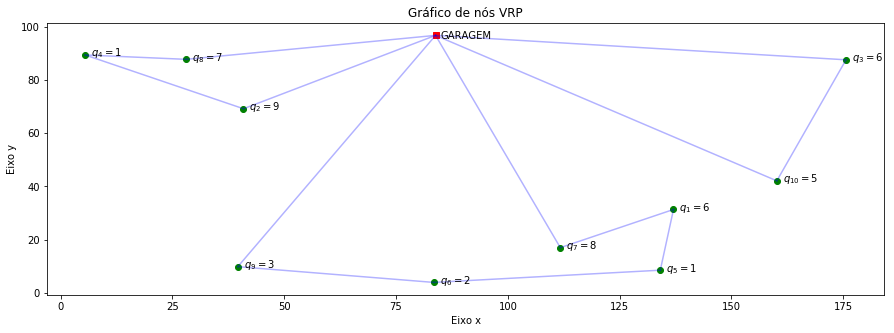

In [8]:
#MOSTRANDO ONDE ESTÃO OS CLIENTES
plt.figure(figsize=(15,5)) #TAMANHO DO GRÁFICO
plt.scatter(loc_x, loc_y, color='green') #PONTOS DO GRÁFICO

#COLOCANDO UMA NOTAÇÃO EM CADA PONTO PARA DIFERENCIAR CADA CLIENTE
#E TAMBÉM COLOCANDO O CUSTO DE CADA CLIENTE A SER VISITADO
for i in clientes:
    plt.annotate('$q_{%d}=%d$'%(i,q[i]),(loc_x[i]+1.3,loc_y[i]-0.5))

#PLOTANDO O LOCAL ONDE OS CAMINHÕES SAEM
plt.plot(loc_x[0],loc_y[0],color='red',marker='s')
plt.annotate('GARAGEM',(loc_x[0]+1,loc_y[0]-1.4))

for i,j in arcos_otimos:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color='blue',alpha=0.3)

plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title("Gráfico de nós VRP")

plt.show()